['/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2016.txt', '/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2015.txt', '/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2014.txt', '/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2017.txt', '/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2020.txt', '/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2019.txt', '/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2018.txt']
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2016.txt
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2015.txt
/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information

<ipython-input-4-13fdb8da2ab4>:76: RuntimeWarning: invalid value encountered in true_divide
  trop_agree_1=trop_agree/trop_numb
<ipython-input-4-13fdb8da2ab4>:77: RuntimeWarning: invalid value encountered in true_divide
  mid_agree_1 =mid_agree/mid_numb


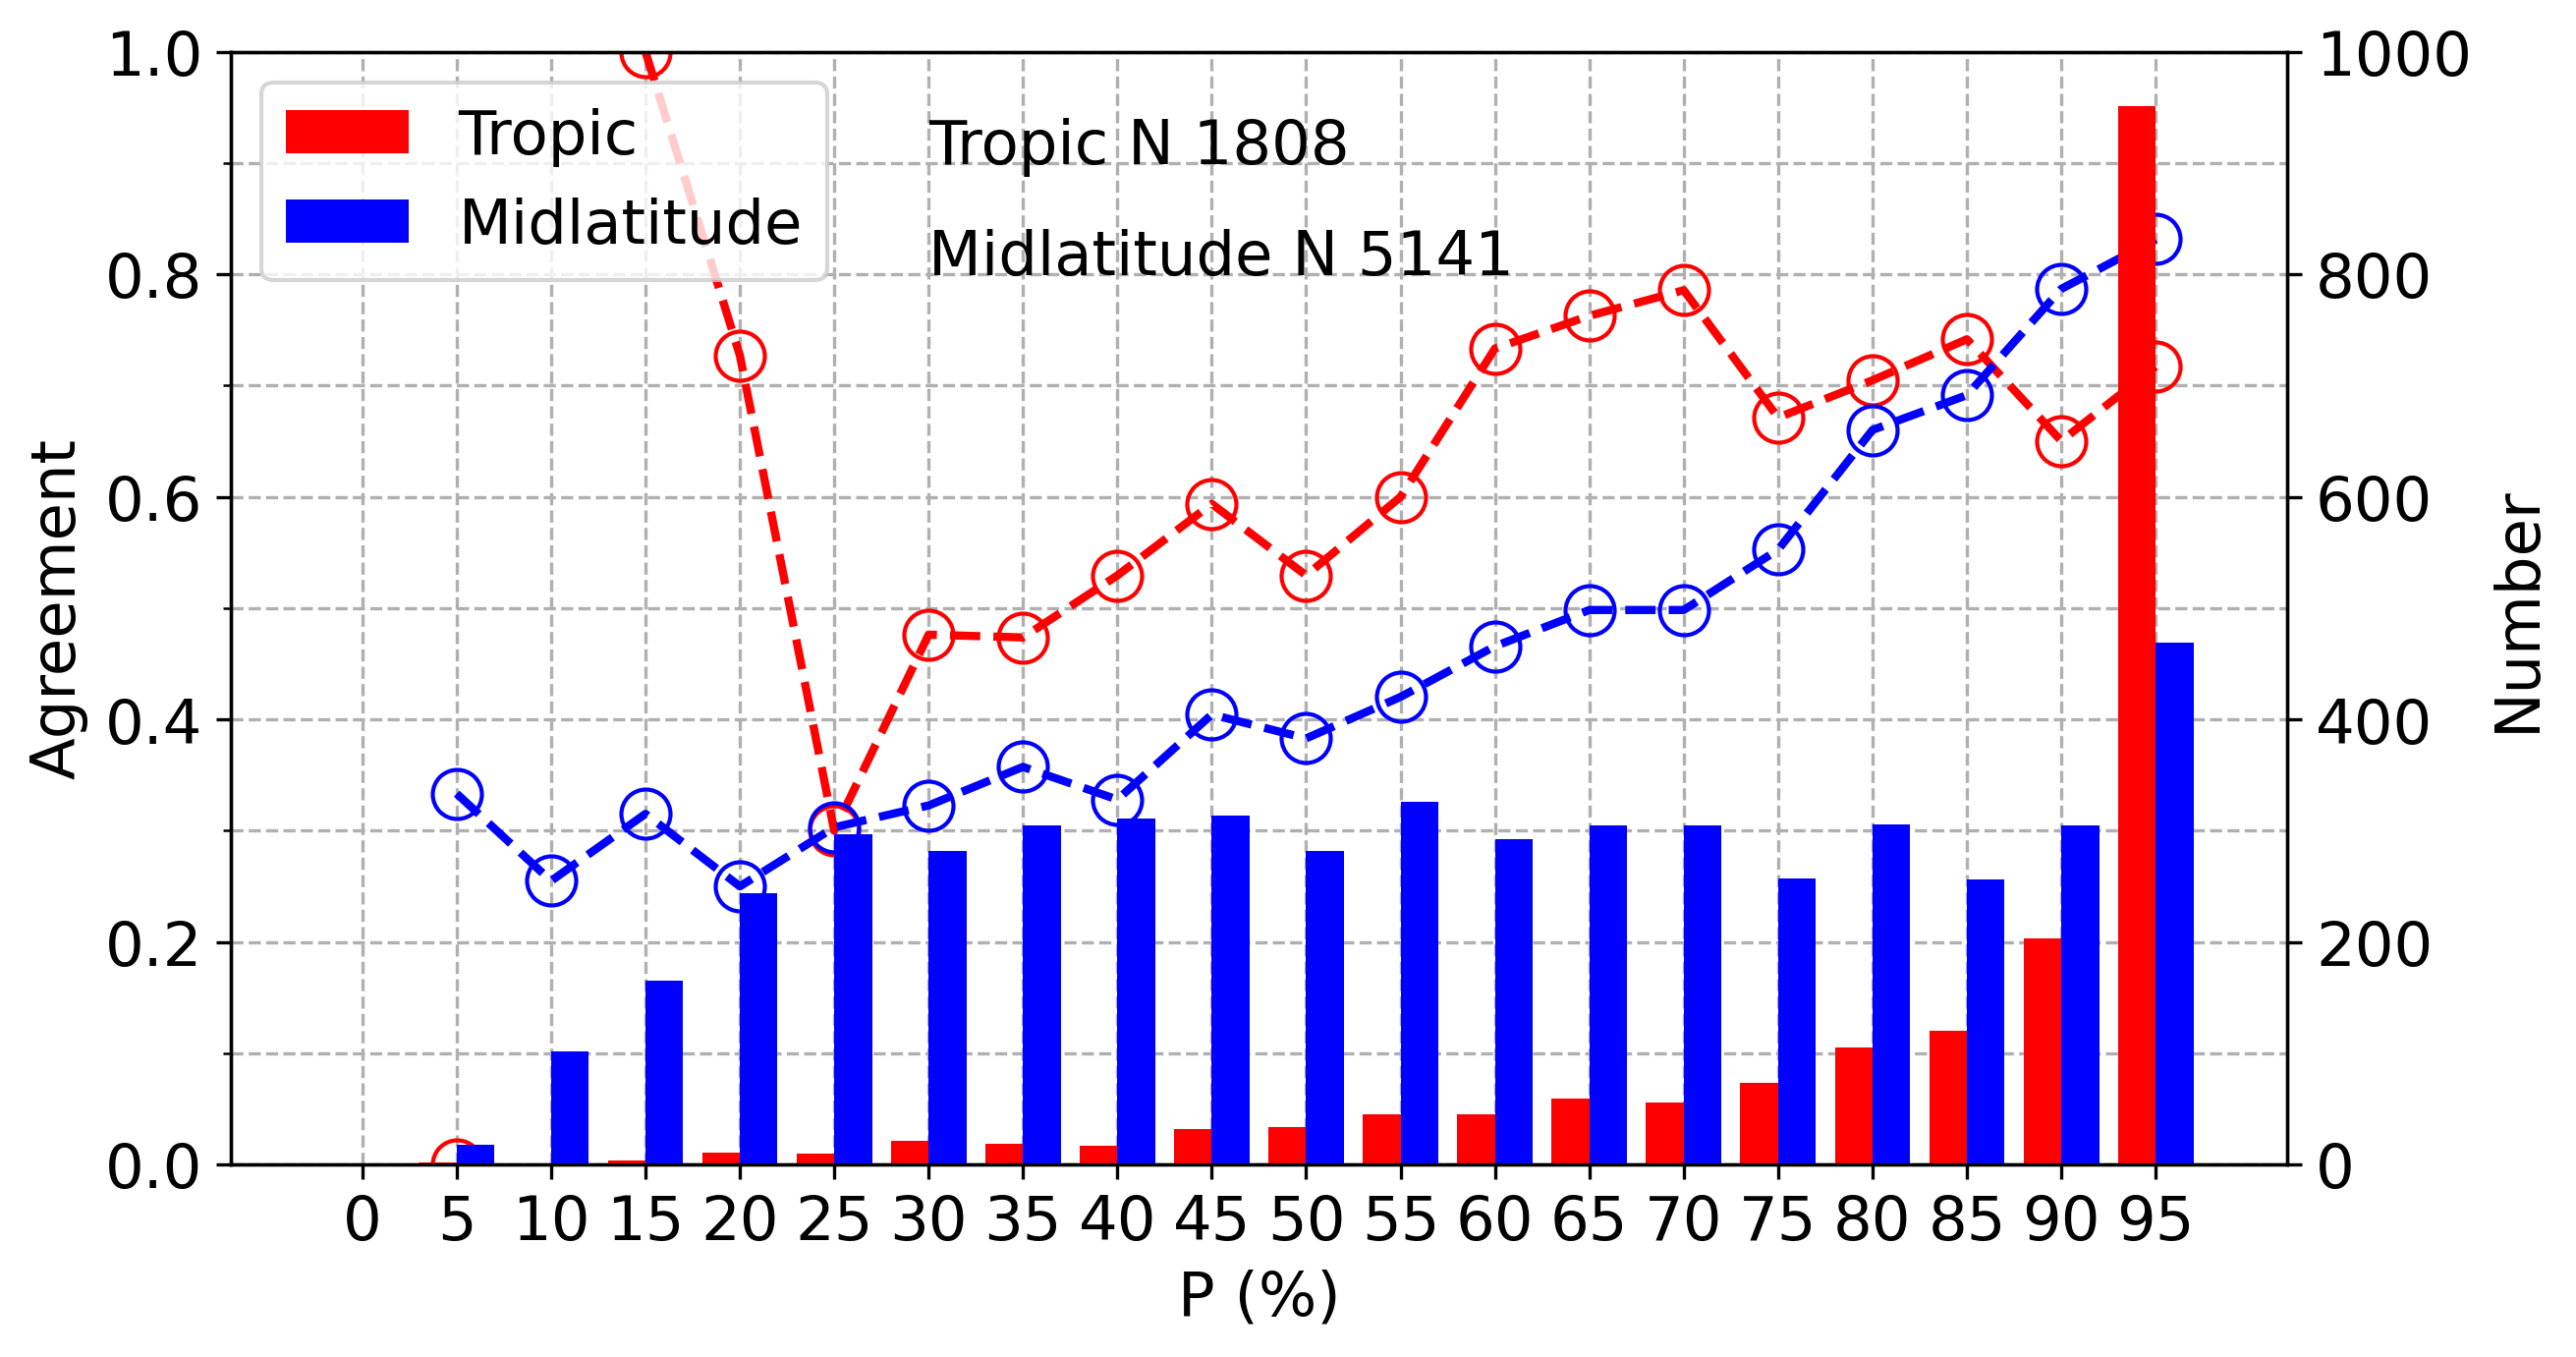

In [4]:
## to plot the agreement between MODIS and GPM, dealing with results from plot_cfad_gpm_modis
def read_text(fname):
    fo=open(fname,'r') #create file object
    #headstr=fo.readline()
    data=fo.readlines()
    #print (data)
    fo.close()  # close object
    return data

# main
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fnames=glob.glob('/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_20*')
#fnames=['/data/keeling/a/yulanh/mydata/OT_modis/plot_output/record_information_gpm_modis_1505_update_2014.txt']
trop_agree=np.zeros(20,'f')
trop_numb =np.zeros(20,'i')
mid_agree =np.zeros(20,'f')
mid_numb  =np.zeros(20,'i')
print(fnames)
for fname in fnames:
    print(fname)
    data=read_text(fname)
    splitcol=data[0].split(' ')
    Ncol=len(splitcol)-splitcol.count('')
    Nrow=len(data)
    #print(Ncol,Nrow)
    # transfer data from string to float
    dataT=np.zeros((Nrow,Ncol-1),'f')

    colocated_fname = np.chararray(Nrow,itemsize=99)

    for i in range(Nrow):
        splitcol=data[i].split(' ')
        k=0
       # print(len(splitcol),splitcol)
        for j in range(len(splitcol)):
            if (j==len(splitcol)-1):
                colocated_fname[i]=splitcol[j]
          
            if splitcol[j] != '' and j < len(splitcol)-1 :
                dataT[i,k]=float(splitcol[j])
                k=k+1

   
    OTlon=dataT[:,0]
    OTlat=dataT[:,1]
    OTprob=dataT[:,2]
    OTflag=dataT[:,3]
    strflag=dataT[:,4]
    
    for pi in range(20):
        threshold=pi*0.05
        threshold1=pi*0.05+0.05
        #print(threshold,threshold1)
        index=np.where((abs(OTlat) < 25) & (OTprob >= threshold) & (OTprob < threshold1))
        index=index[0]
        #print(index.shape)
        trop_numb[pi]=trop_numb[pi]+index.shape
        index1=np.where((abs(OTlat) < 25) & (OTprob >= threshold) & (OTprob < threshold1) & (OTflag == 1))
        index1=index1[0]
        trop_agree[pi]=trop_agree[pi]+index1.shape
        
        index=np.where((abs(OTlat) >= 25) & (OTprob >= threshold) & (OTprob < threshold1))
        index=index[0]
        #print(index.shape)
        mid_numb[pi]=mid_numb[pi]+index.shape
        index1=np.where((abs(OTlat) >= 25) & (OTprob >= threshold) & (OTprob < threshold1) & (OTflag == 1))
        index1=index1[0]
        mid_agree[pi]=mid_agree[pi]+index1.shape
        #print(index1.shape,mid_agree[pi])

trop_agree_1=trop_agree/trop_numb
mid_agree_1 =mid_agree/mid_numb

x=np.arange(20)*5
print(x)
width=2
fig, ax = plt.subplots(figsize=[9,5],dpi=300)
ax.plot(x,trop_agree_1,'ro--',linewidth=2,markersize=12,mfc='none')
ax.plot(x,mid_agree_1,'bo--',linewidth=2,markersize=12,mfc='none')
ax.set_xticks(x)
ax.set_xlabel('P (%)',size=15)
ax.set_ylabel('Agreement',size=15)
ax.tick_params(labelsize=15)
ax.set_ylim([0,1])
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
#ax.grid(b=True,linestyle='--')
ax.grid(b=True,which='both',linestyle='--')
ax.text(30,0.9,'Tropic N 1808',fontsize=15)
ax.text(30,0.8,'Midlatitude N 5141',fontsize=15)

ax1=ax.twinx() # instantiate a second axes that shares the same x-axis 
ax1.bar(x-width/2,trop_numb,width,color='r')
ax1.bar(x+width/2,mid_numb,width,color='b')
ax1.tick_params(labelsize=15)
ax1.set_ylabel('Number',size=15)
ax1.legend(['Tropic','Midlatitude'],loc=2,fontsize=15)
ax1.set_ylim([0,1000])
#https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
print(np.sum(trop_numb+mid_numb))
print(x-width/2)
print(np.sum(trop_numb),np.sum(mid_numb))